## 1. Importing the Needed Packages

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2. Cleaning and Processing the Data

### 2a. Adding the Column "Order Date" and "Shipment Date" 

In [18]:
# Load the data
orders_shipments_df = pd.read_csv('data/orders_and_shipments.csv')

# Remove leading and trailing spaces from column names
orders_shipments_df.columns = orders_shipments_df.columns.str.strip()

# Combine order year, month, and day into a single datetime column
orders_shipments_df['Order Date'] = pd.to_datetime(
    orders_shipments_df['Order Year'].astype(str) + '-' +
    orders_shipments_df['Order Month'].astype(str).str.zfill(2) + '-' +
    orders_shipments_df['Order Day'].astype(str).str.zfill(2)
)

# Combine shipment year, month, and day into a single datetime column
orders_shipments_df['Shipment Date'] = pd.to_datetime(
    orders_shipments_df['Shipment Year'].astype(str) + '-' +
    orders_shipments_df['Shipment Month'].astype(str).str.zfill(2) + '-' +
    orders_shipments_df['Shipment Day'].astype(str).str.zfill(2)
)

orders_shipments_df.head()


,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,2015,2,27,Standard Class,4,400,0.25,200,2015-02-21,2015-02-27
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,2015,3,6,Standard Class,4,400,0.09,200,2015-03-02,2015-03-06
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,2015,4,20,Standard Class,4,400,0.06,200,2015-04-18,2015-04-20
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,2015,6,12,Standard Class,4,400,0.15,200,2015-06-10,2015-06-12
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,2015,6,12,Standard Class,4,400,0.13,200,2015-06-10,2015-06-12


### 2b. Calculated the Days to Ship Order

In [19]:
# Calculate the days between Order Date and Shipment Date
orders_shipments_df['Days Between Order and Shipment'] = (orders_shipments_df['Shipment Date'] - orders_shipments_df['Order Date']).dt.days

orders_shipments_df.head()

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Days Between Order and Shipment
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,2,27,Standard Class,4,400,0.25,200,2015-02-21,2015-02-27,6
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,3,6,Standard Class,4,400,0.09,200,2015-03-02,2015-03-06,4
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,4,20,Standard Class,4,400,0.06,200,2015-04-18,2015-04-20,2
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,6,12,Standard Class,4,400,0.15,200,2015-06-10,2015-06-12,2
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,6,12,Standard Class,4,400,0.13,200,2015-06-10,2015-06-12,2


### 2c. Comparing the Actual Days Taken to Ship Order ("Days Between Order and Shipment") vs the Expected Days Taken ("Shipment Days - Scheduled")

In [20]:
# Compare actual days to scheduled shipment days
orders_shipments_df['Difference from Scheduled'] = (
    orders_shipments_df['Days Between Order and Shipment'] - orders_shipments_df['Shipment Days - Scheduled']
)

orders_shipments_df.to_csv('cleaned_orders_shipments_df.csv', index=False)

orders_shipments_df


,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Days Between Order and Shipment,Difference from Scheduled
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,27,Standard Class,4,400,0.25,200,2015-02-21,2015-02-27,6,2
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,6,Standard Class,4,400,0.09,200,2015-03-02,2015-03-06,4,0
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,20,Standard Class,4,400,0.06,200,2015-04-18,2015-04-20,2,-2
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,12,Standard Class,4,400,0.15,200,2015-06-10,2015-06-12,2,-2
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,12,Standard Class,4,400,0.13,200,2015-06-10,2015-06-12,2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,176561,201712,2017,12,5,04:59,1,Fan Shop,Toys,...,11,Standard Class,4,12,0.06,6,2017-12-05,2017-12-11,6,2
30867,7908,19762,201504,2015,4,26,10:10,1,Fan Shop,Hunting & Shooting,...,30,Standard Class,4,30,0.12,68,2015-04-26,2015-04-30,4,0
30868,29326,73368,201603,2016,3,4,01:51,1,Fan Shop,Hunting & Shooting,...,6,Second Class,2,30,0.09,68,2016-03-04,2016-03-06,2,0
30869,63308,158284,201707,2017,7,13,03:15,1,Fan Shop,Hunting & Shooting,...,17,Second Class,2,150,0.02,60,2017-07-13,2017-07-17,4,2


### 2d. Mapping the product categories to a broader category for standardisation

In [21]:
# Define the mapping dictionary
category_mapping = {
    'Accessories': ['Accessories', 'Fitness Accessories'],
    'Apparel': ['Apparel', "Women's Apparel", "Men's Clothing", "Girls' Apparel", "Women's Clothing", "Children's Clothing", "Golf Apparel", 'Golf Shoes', 'Golf Gloves', "Men's Footwear"],
    'Bags': ['Golf Bags & Carts'],
    'Drinkware': [],
    'Electronics': ['Electronics', 'Consumer Electronics', 'Cameras', 'CDs', 'DVDs', 'Video Games', 'Music', "Trade-In"],
    'Fun': ['Toys', 'Indoor/Outdoor Games', 'As Seen on  TV!', 'Crafts'],
    'Gift Cards': [],
    'Headgear': [],
    'Housewares': ['Garden', 'Pet Supplies'],
    'Lifestyle': ['Baby', 'Cardio Equipment', 'Strength Training',
        'Water Sports', 'Camping & Hiking', 'Golf Balls', "Kids' Golf Clubs", 'Lacrosse',
        'Soccer', 'Cleats', "Men's Golf Clubs", "Women's Golf Clubs", 'Hockey',
        'Baseball & Softball', 'Tennis & Racquet', 'Basketball', 'Hunting & Shooting', 'Boxing & MMA', 'Fishing', 'Health and Beauty', 'Shop By Sport', 'Sporting Goods'
    ],
    'Notebooks & Journals': [],
    'Office': ['Books']
}

# Function to map product category to main category
def map_category(category):
    for main_category, subcategories in category_mapping.items():
        if category in subcategories:
            return main_category
    return 'Other'  # Default if no match is found

# Apply the mapping to create a new column
orders_shipments_df = orders_shipments_df.copy()
orders_shipments_df['main_product_category'] = orders_shipments_df['Product Category'].apply(map_category)

orders_shipments_df.to_csv('cleaned_orders_shipments_df.csv', index=False)

orders_shipments_df

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Days Between Order and Shipment,Difference from Scheduled,main_product_category
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,Standard Class,4,400,0.25,200,2015-02-21,2015-02-27,6,2,Lifestyle
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,Standard Class,4,400,0.09,200,2015-03-02,2015-03-06,4,0,Lifestyle
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,Standard Class,4,400,0.06,200,2015-04-18,2015-04-20,2,-2,Lifestyle
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Standard Class,4,400,0.15,200,2015-06-10,2015-06-12,2,-2,Lifestyle
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Standard Class,4,400,0.13,200,2015-06-10,2015-06-12,2,-2,Lifestyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,176561,201712,2017,12,5,04:59,1,Fan Shop,Toys,...,Standard Class,4,12,0.06,6,2017-12-05,2017-12-11,6,2,Fun
30867,7908,19762,201504,2015,4,26,10:10,1,Fan Shop,Hunting & Shooting,...,Standard Class,4,30,0.12,68,2015-04-26,2015-04-30,4,0,Lifestyle
30868,29326,73368,201603,2016,3,4,01:51,1,Fan Shop,Hunting & Shooting,...,Second Class,2,30,0.09,68,2016-03-04,2016-03-06,2,0,Lifestyle
30869,63308,158284,201707,2017,7,13,03:15,1,Fan Shop,Hunting & Shooting,...,Second Class,2,150,0.02,60,2017-07-13,2017-07-17,4,2,Lifestyle


## 3. Analysis and Understanding Delivery Efficiency

### 3a. Percentage of Orders that Fall into Each Category (e.g., "Good (Early)", "Good (On Time)", "Bad (Delayed)"). 

In [25]:
# Define conditions for early, on-time, and delayed shipments
conditions = [
    (orders_shipments_df['Difference from Scheduled'] < 0),  # Early shipment
    (orders_shipments_df['Difference from Scheduled'] == 0), # On-time shipment
    (orders_shipments_df['Difference from Scheduled'] > 0)   # Delayed shipment
]

# Define corresponding labels
choices = ['Good (Early)', 'Good (On Time)', 'Bad (Delayed)']

# Apply np.select to classify each order
orders_shipments_df['Shipping Performance'] = np.select(conditions, choices, default='Unknown')

# Summary of performance counts and percentages
performance_summary = orders_shipments_df['Shipping Performance'].value_counts(normalize=True).mul(100).round(2)
print(performance_summary)

orders_shipments_df.to_csv('cleaned_orders_shipments_performance_df.csv', index=False)

orders_shipments_df

Shipping Performance
Bad (Delayed)     43.54
Good (Early)      34.72
Good (On Time)    21.74
Name: proportion, dtype: float64


,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Days Between Order and Shipment,Difference from Scheduled,main_product_category,Shipping Performance
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,4,400,0.25,200,2015-02-21,2015-02-27,6,2,Lifestyle,Bad (Delayed)
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,4,400,0.09,200,2015-03-02,2015-03-06,4,0,Lifestyle,Good (On Time)
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,4,400,0.06,200,2015-04-18,2015-04-20,2,-2,Lifestyle,Good (Early)
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,4,400,0.15,200,2015-06-10,2015-06-12,2,-2,Lifestyle,Good (Early)
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,4,400,0.13,200,2015-06-10,2015-06-12,2,-2,Lifestyle,Good (Early)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,176561,201712,2017,12,5,04:59,1,Fan Shop,Toys,...,4,12,0.06,6,2017-12-05,2017-12-11,6,2,Fun,Bad (Delayed)
30867,7908,19762,201504,2015,4,26,10:10,1,Fan Shop,Hunting & Shooting,...,4,30,0.12,68,2015-04-26,2015-04-30,4,0,Lifestyle,Good (On Time)
30868,29326,73368,201603,2016,3,4,01:51,1,Fan Shop,Hunting & Shooting,...,2,30,0.09,68,2016-03-04,2016-03-06,2,0,Lifestyle,Good (On Time)
30869,63308,158284,201707,2017,7,13,03:15,1,Fan Shop,Hunting & Shooting,...,2,150,0.02,60,2017-07-13,2017-07-17,4,2,Lifestyle,Bad (Delayed)


### 3b. Analysis by Product Category (mean difference in expected vs actual shipping time)

In [51]:
# Remove rows where either 'Order Date' or 'Shipment Date' is NaN
orders_shipments_df = orders_shipments_df.dropna(subset=['Order Date', 'Shipment Date'])

# Group by Product Category and Warehouse Country to analyze mean expected and actual shipping times
category_orders_shipments_analysis = orders_shipments_df.groupby(['main_product_category', 'Warehouse Country']).agg(
    Mean_Expected_Time=('Shipment Days - Scheduled', 'mean'),
    Mean_Actual_Time=('Days Between Order and Shipment', 'mean')
).reset_index()

# Calculate the difference between actual and expected times
category_orders_shipments_analysis['Mean_Difference'] = category_orders_shipments_analysis['Mean_Actual_Time'] - category_orders_shipments_analysis['Mean_Expected_Time']

category_orders_shipments_analysis.to_csv('category_warehouse_mean_orders_shipments_analysis.csv', index=False)

category_orders_shipments_analysis

,main_product_category,Warehouse Country,Mean_Expected_Time,Mean_Actual_Time,Mean_Difference
0,Accessories,Puerto Rico,3.007463,17.880597,14.873134
1,Accessories,USA,3.037815,19.567227,16.529412
2,Apparel,Puerto Rico,3.060064,1.844089,-1.215974
3,Apparel,USA,3.096313,4.168245,1.071932
4,Bags,Puerto Rico,1.250000,-93.250000,-94.500000
5,Bags,USA,3.111111,3.555556,0.444444
6,Electronics,Puerto Rico,3.076923,3.290110,0.213187
7,Electronics,USA,3.074667,4.573333,1.498667
8,Fun,Puerto Rico,3.121934,10.761183,7.639250
9,Fun,USA,3.067303,2.261482,-0.805821


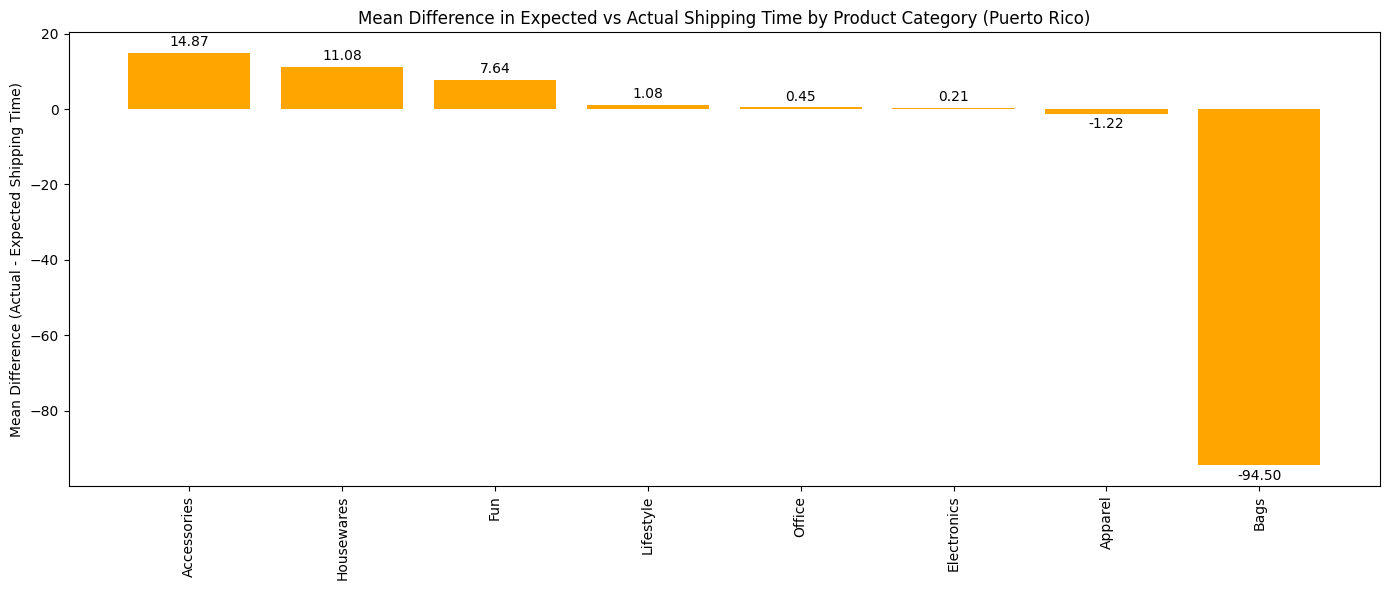

In [57]:
# Separate data by Warehouse Country
puerto_rico_data = category_orders_shipments_analysis[category_orders_shipments_analysis['Warehouse Country'] == 'Puerto Rico']
usa_data = category_orders_shipments_analysis[category_orders_shipments_analysis['Warehouse Country'] == 'USA']

# Sort each by Mean_Difference for better visualization
puerto_rico_data = puerto_rico_data.sort_values(by='Mean_Difference', ascending=False)
usa_data = usa_data.sort_values(by='Mean_Difference', ascending=False)

# Plot for Puerto Rico
plt.figure(figsize=(14, 6))
plt.bar(puerto_rico_data['main_product_category'], puerto_rico_data['Mean_Difference'], color='orange')
plt.xticks(rotation=90)
plt.ylabel('Mean Difference (Actual - Expected Shipping Time)')
plt.title('Mean Difference in Expected vs Actual Shipping Time by Product Category (Puerto Rico)')
plt.tight_layout()

# Add value labels to each bar with extra space
for bar in bars:
    yval = bar.get_height()
    offset = 1 if yval >= 0 else -1 
    plt.text(bar.get_x() + bar.get_width() / 2, yval + offset, f'{yval:.2f}', ha='center', va='bottom' if yval >= 0 else 'top') 

plt.show()


1. Negative Mean Difference (Significant Early Shipments):
    - The Bags category stands out with a significantly large negative mean difference, indicating that these items are consistently shipped much earlier than expected. 
    - This is an unusual trend and could suggest overestimation in expected shipping times or high efficiency in processing orders for this category. 
    - A negative difference at this scale may imply the need for recalibrating expected shipping times for Bags, as they may be set too conservatively.

2. Positive Mean Difference (Delays):
    - Categories like Accessories, Housewares, and Fun show a positive mean difference, indicating these items are shipped later than expected, although the delays are moderate. 
    - These categories may be facing some delays due to operational issues, stock availability, or logistics bottlenecks, but the delay is not as extreme compared to what would have been observed if the mean difference was larger.

3. Minimal Difference (On-Time Shipping):
    - Other categories, such as Lifestyle, Office, and Electronics, show almost no difference between actual and expected shipping times, implying that these items generally meet their shipping targets. 
    - This consistency suggests that operational processes for these categories are functioning effectively.

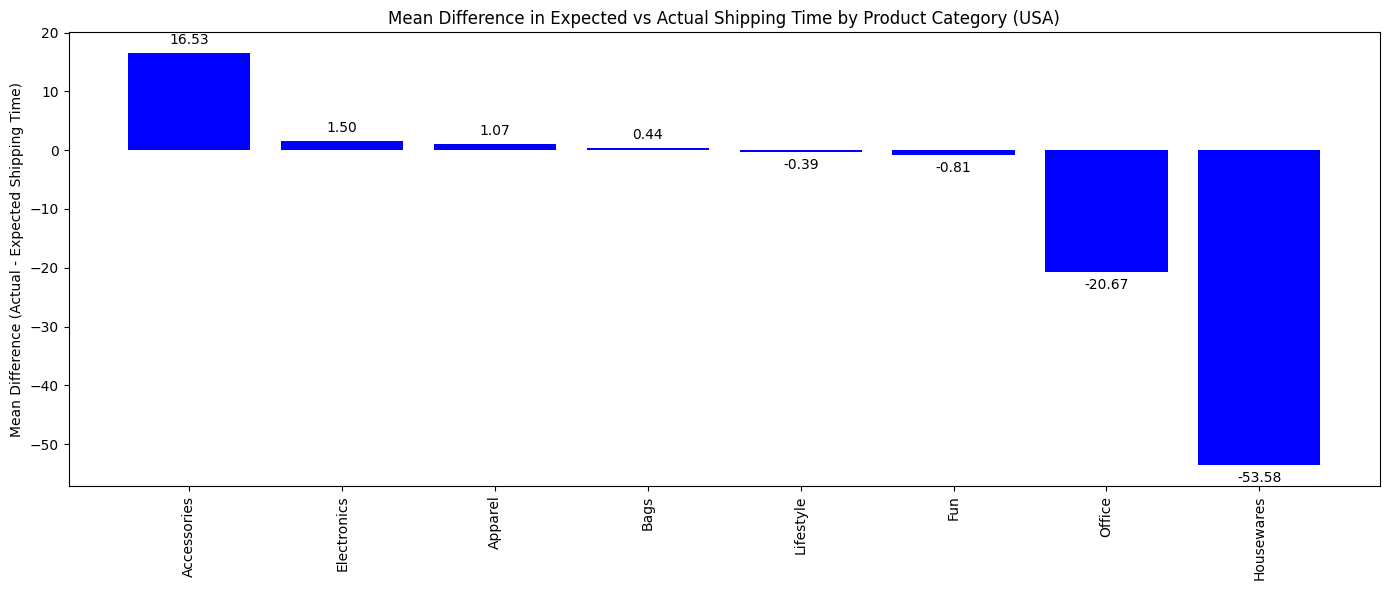

In [55]:
# Plot for USA
plt.figure(figsize=(14, 6))
bars = plt.bar(usa_data['main_product_category'], usa_data['Mean_Difference'], color='blue')
plt.xticks(rotation=90)
plt.ylabel('Mean Difference (Actual - Expected Shipping Time)')
plt.title('Mean Difference in Expected vs Actual Shipping Time by Product Category (USA)')
plt.tight_layout()

# Add value labels to each bar with extra space
for bar in bars:
    yval = bar.get_height()
    offset = 1 if yval >= 0 else -1  
    plt.text(bar.get_x() + bar.get_width() / 2, yval + offset, f'{yval:.2f}', ha='center', va='bottom' if yval >= 0 else 'top') 

plt.show()


1. Negative Mean Difference (Early Shipments):
    - The Office and Housewares categories have substantial negative mean differences, indicating these products are being shipped significantly earlier than expected. 
    - This early shipment trend may suggest that the estimated shipping times are too conservative for these categories, or that the warehouse processes for these items are particularly efficient. 
    - This is a positive sign from an operational perspective, as it could lead to enhanced customer satisfaction due to early deliveries. 
    - However, there might be opportunities to adjust the expected times to more accurately reflect actual processing capabilities.

2. Positive Mean Difference (Delays):
    - The Accessories category shows a positive mean difference, implying that these items are shipped later than expected. 
    - This delay might point to challenges specific to Accessories in the USA warehouse, such as supply chain issues, inventory shortages, or other logistical bottlenecks. Addressing these delays could help bring this category in line with customer expectations.

3. Minimal or No Difference (On-Time Shipping):
    - Categories like Electronics, Apparel, Bags, and Lifestyle exhibit minimal to no difference between expected and actual shipping times. This alignment suggests that these categories are consistently meeting their expected shipping times, which reflects stable and reliable order fulfillment processes.

### 3c. Analysis by Product Category (number of delayed, early, on time of each category)

In [37]:
# Count occurrences of each "Shipping Performance" category within each Product Category
performance_counts = orders_shipments_df.groupby(['main_product_category', 'Shipping Performance']).size().unstack(fill_value=0)

# Calculate total shipments per category and the percentage of each performance type
performance_counts['Total Shipments'] = performance_counts.sum(axis=1)
performance_counts['Good_Percentage'] = ((performance_counts['Good (Early)'] + performance_counts['Good (On Time)']) / performance_counts['Total Shipments']) * 100
performance_counts['Bad_Percentage'] = (performance_counts['Bad (Delayed)'] / performance_counts['Total Shipments']) * 100

performance_counts = performance_counts.reset_index()

performance_counts.to_csv('category_performance_count.csv', index=False)

performance_counts

Shipping Performance,main_product_category,Bad (Delayed),Good (Early),Good (On Time),Total Shipments,Good_Percentage,Bad_Percentage
0,Accessories,187,105,80,372,49.731183,50.268817
1,Apparel,3542,2818,1733,8093,56.233782,43.766218
2,Bags,6,4,3,13,53.846154,46.153846
3,Electronics,503,472,230,1205,58.257261,41.742739
4,Fun,1640,1250,695,3585,54.253835,45.746165
5,Housewares,43,81,18,142,69.718310,30.281690
6,Lifestyle,7499,5960,3946,17405,56.914680,43.085320
7,Office,22,28,6,56,60.714286,39.285714


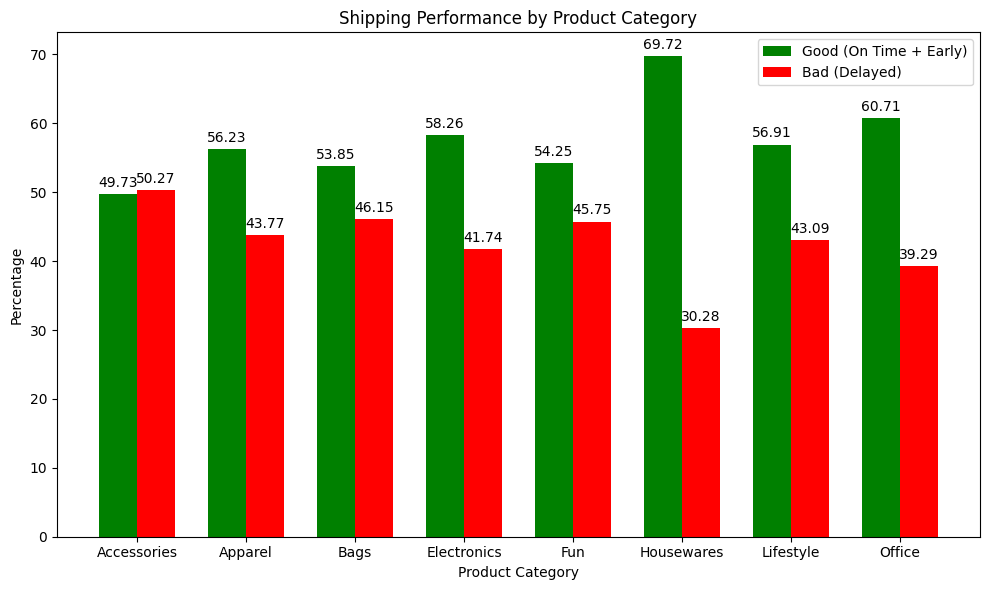

In [38]:
# Define data for the graph
categories = performance_counts['main_product_category']
good_percentage = performance_counts['Good_Percentage']
bad_percentage = performance_counts['Bad_Percentage']

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, good_percentage, width, color='green', label='Good (On Time + Early)')
rects2 = ax.bar(x + width/2, bad_percentage, width, color='red', label='Bad (Delayed)')

# Add labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Product Category')
ax.set_ylabel('Percentage')
ax.set_title('Shipping Performance by Product Category')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Display the values on top of each bar
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


- Top Performers: Housewares and Office categories show the best shipping performance, with a significant majority of shipments being on time or early. These categories may serve as models for best practices in inventory management and logistics.
- Moderate Performers: Electronics and Lifestyle categories are performing moderately well. However, there is room to reduce delays and further improve shipping reliability.
- Categories with Improvement Potential: Apparel, Fun, Accessories, and Bags all show relatively high delay rates. For these categories, it may be beneficial to analyze specific issues causing delays, such as stock replenishment challenges, supplier reliability, or demand fluctuations.

In [39]:
# Group by Product Category and Warehouse Country to count occurrences of each "Shipping Performance" category
performance_counts = orders_shipments_df.groupby(['main_product_category', 'Warehouse Country', 'Shipping Performance']).size().unstack(fill_value=0)

# Calculate total shipments per category and warehouse country, and the percentage of each performance type
performance_counts['Total Shipments'] = performance_counts.sum(axis=1)
performance_counts['Good_Percentage'] = ((performance_counts['Good (Early)'] + performance_counts['Good (On Time)']) / performance_counts['Total Shipments']) * 100
performance_counts['Bad_Percentage'] = (performance_counts['Bad (Delayed)'] / performance_counts['Total Shipments']) * 100

# Reset the index to make 'main_product_category' and 'Warehouse Country' regular columns
performance_counts = performance_counts.reset_index()

# Save the result to a CSV file
performance_counts.to_csv('category_warehouse_performance_count.csv', index=False)

performance_counts

Shipping Performance,main_product_category,Warehouse Country,Bad (Delayed),Good (Early),Good (On Time),Total Shipments,Good_Percentage,Bad_Percentage
0,Accessories,Puerto Rico,62,42,30,134,53.731343,46.268657
1,Accessories,USA,125,63,50,238,47.478992,52.521008
2,Apparel,Puerto Rico,1319,1095,716,3130,57.859425,42.140575
3,Apparel,USA,2223,1723,1017,4963,55.208543,44.791457
4,Bags,Puerto Rico,2,1,1,4,50.000000,50.000000
5,Bags,USA,4,3,2,9,55.555556,44.444444
6,Electronics,Puerto Rico,185,186,84,455,59.340659,40.659341
7,Electronics,USA,318,286,146,750,57.600000,42.400000
8,Fun,Puerto Rico,645,504,237,1386,53.463203,46.536797
9,Fun,USA,995,746,458,2199,54.752160,45.247840


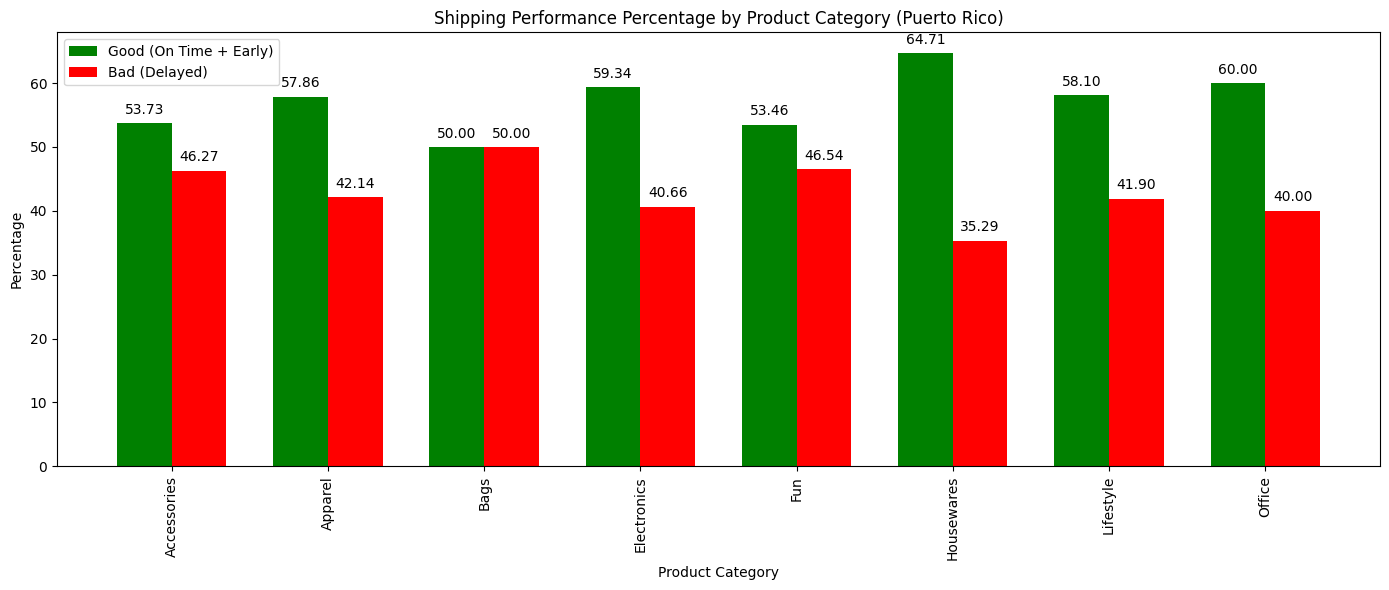

In [40]:
# Separate data by warehouse country
puerto_rico_performance = performance_counts[performance_counts['Warehouse Country'] == 'Puerto Rico']
usa_performance = performance_counts[performance_counts['Warehouse Country'] == 'USA']

# Define data for the graph
categories = puerto_rico_performance['main_product_category']
good_percentage = puerto_rico_performance['Good_Percentage']
bad_percentage = puerto_rico_performance['Bad_Percentage']

# Set up the bar chart
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, good_percentage, width, color='green', label='Good (On Time + Early)')
plt.bar(x + width/2, bad_percentage, width, color='red', label='Bad (Delayed)')

# Add labels, title, and legend
plt.xlabel('Product Category')
plt.ylabel('Percentage')
plt.title('Shipping Performance Percentage by Product Category (Puerto Rico)')
plt.xticks(x, categories, rotation=90)
plt.legend()

# Display the values on top of each bar
for i in range(len(categories)):
    plt.text(x[i] - width/2, good_percentage.iloc[i] + 1, f'{good_percentage.iloc[i]:.2f}', ha='center', va='bottom')
    plt.text(x[i] + width/2, bad_percentage.iloc[i] + 1, f'{bad_percentage.iloc[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

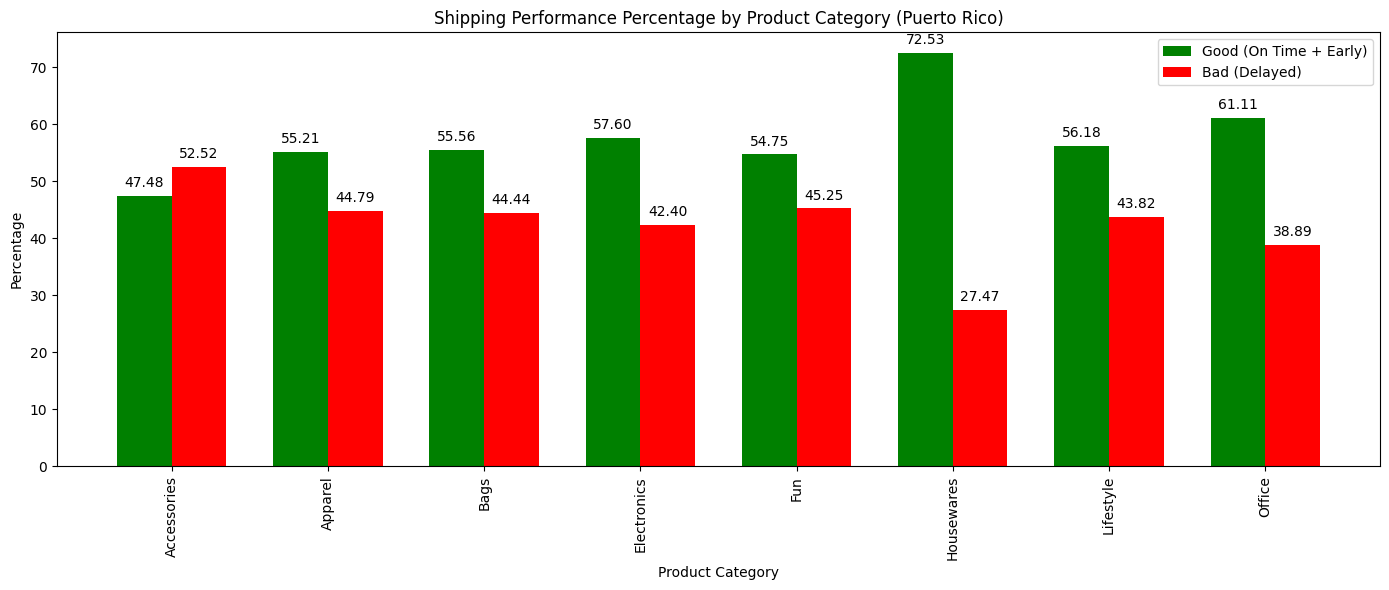

In [41]:
# Define data for the graph
categories = usa_performance['main_product_category']
good_percentage = usa_performance['Good_Percentage']
bad_percentage = usa_performance['Bad_Percentage']

# Set up the bar chart
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, good_percentage, width, color='green', label='Good (On Time + Early)')
plt.bar(x + width/2, bad_percentage, width, color='red', label='Bad (Delayed)')

# Add labels, title, and legend
plt.xlabel('Product Category')
plt.ylabel('Percentage')
plt.title('Shipping Performance Percentage by Product Category (Puerto Rico)')
plt.xticks(x, categories, rotation=90)
plt.legend()

# Display the values on top of each bar
for i in range(len(categories)):
    plt.text(x[i] - width/2, good_percentage.iloc[i] + 1, f'{good_percentage.iloc[i]:.2f}', ha='center', va='bottom')
    plt.text(x[i] + width/2, bad_percentage.iloc[i] + 1, f'{bad_percentage.iloc[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 3d. Comparison between Warehouse Country Performance

  Warehouse Country  Avg_Mean_Diff
0       Puerto Rico       1.370473
1               USA      -0.063168


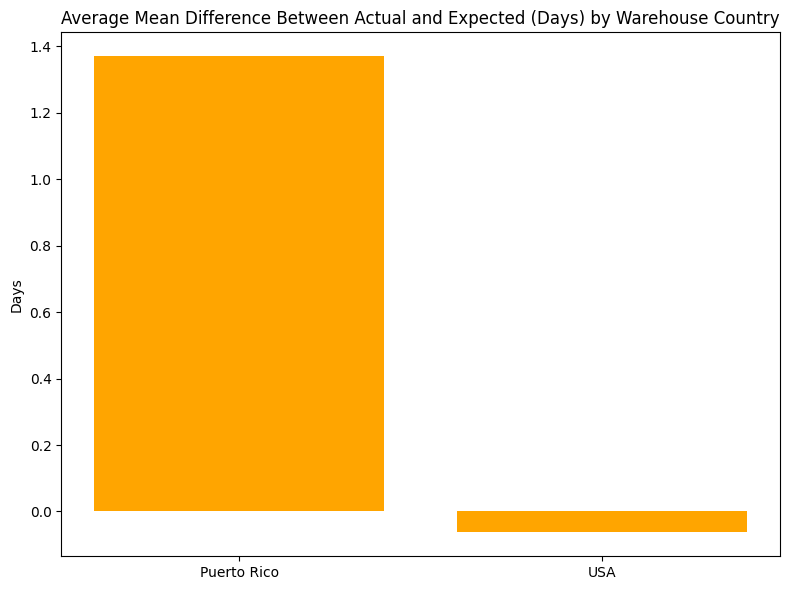

In [42]:
cleaned_orders_shipments_df = pd.read_csv('cleaned_orders_shipments_df.csv')

# Group by Warehouse Country and calculate the mean actual shipping time
country_mean_comparison = cleaned_orders_shipments_df.groupby('Warehouse Country').agg(
    Avg_Mean_Diff=('Difference from Scheduled', 'mean')
).reset_index()

# Display the result
print(country_mean_comparison)

# Plot only the Avg_Mean_Actual_Time
plt.figure(figsize=(8, 6))
plt.bar(country_mean_comparison['Warehouse Country'], country_mean_comparison['Avg_Mean_Diff'], color='orange')
plt.ylabel('Days')
plt.title('Average Mean Difference Between Actual and Expected (Days) by Warehouse Country')
plt.tight_layout()
plt.show()


Observations

1. Puerto Rico:
    - The mean difference for Puerto Rico is approximately 1.4 days, indicating that, on average, shipments from the Puerto Rico warehouse are delayed by about 1.4 days beyond the expected shipping time. 
    - This substantial delay suggests there may be underlying issues impacting Puerto Rico’s ability to meet shipping targets, such as logistical constraints, supply chain inefficiencies, or resource limitations.

2. USA:
    - In contrast, the mean difference for the USA is almost negligible, showing a very small positive difference close to zero, of -0.06 days, indicating that shipments are generally shipped out earlier than expected. 
    - This implies that shipments from the USA warehouse are generally meeting their expected times, with minimal delays. 
    - The efficient performance of the USA warehouse could be attributed to better logistics, streamlined order processing, or more reliable supplier networks.

Analysis and Implications
- Performance Disparity: The significant difference in performance between Puerto Rico and the USA indicates a notable disparity in shipping reliability. Puerto Rico’s higher delay rate suggests that this location might face unique challenges that are not present in the USA. Potential issues could include longer transportation routes, delays in receiving goods, or limited capacity for order processing.

In [43]:
cleaned_orders_shipments_performance_df = pd.read_csv('cleaned_orders_shipments_performance_df.csv')

country_performance = cleaned_orders_shipments_performance_df.groupby('Warehouse Country').apply(lambda x: pd.Series({
    'Total_Shipments': len(x),
    'Total_Good': len(x[x['Shipping Performance'].isin(['Good (On Time)', 'Good (Early)'])]),
    'Total_Bad': len(x[x['Shipping Performance'] == 'Bad (Delayed)'])
})).reset_index()

# Calculate percentages
country_performance['Good_Percentage'] = (country_performance['Total_Good'] / country_performance['Total_Shipments']) * 100
country_performance['Bad_Percentage'] = (country_performance['Total_Bad'] / country_performance['Total_Shipments']) * 100

# Display the result
country_performance

/var/folders/fl/slc798r55sq_x96fvbs6fx4h0000gn/T/ipykernel_77314/348524651.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_performance = cleaned_orders_shipments_performance_df.groupby('Warehouse Country').apply(lambda x: pd.Series({


,Warehouse Country,Total_Shipments,Total_Good,Total_Bad,Good_Percentage,Bad_Percentage
0,Puerto Rico,11874,6830,5044,57.520633,42.479367
1,USA,18997,10599,8398,55.793020,44.206980


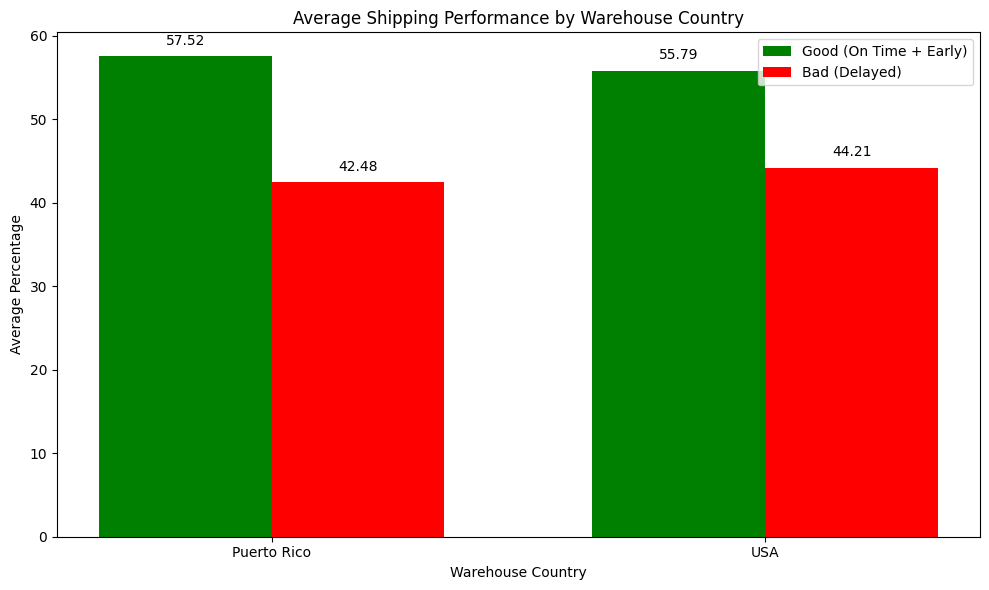

In [45]:
# Define colors for the good and bad percentages
colors = ['green', 'red']

# Set up data
countries = country_performance['Warehouse Country']
good_percentage = country_performance['Good_Percentage']
bad_percentage = country_performance['Bad_Percentage']

# Define the x locations for the groups and the width of each bar
x = np.arange(len(countries))
width = 0.35  # the width of the bars

# Plot the side-by-side bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, good_percentage, width, color=colors[0], label='Good (On Time + Early)')
plt.bar(x + width/2, bad_percentage, width, color=colors[1], label='Bad (Delayed)')

# Add labels, title, and custom x-axis tick labels
plt.xlabel('Warehouse Country')
plt.ylabel('Average Percentage')
plt.title('Average Shipping Performance by Warehouse Country')
plt.xticks(x, countries)
plt.legend()

# Display the values on top of each bar
for i in range(len(countries)):
    plt.text(x[i] - width/2, good_percentage.iloc[i] + 1, f'{good_percentage.iloc[i]:.2f}', ha='center', va='bottom')
    plt.text(x[i] + width/2, bad_percentage.iloc[i] + 1, f'{bad_percentage.iloc[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Observations
- Puerto Rico has a slightly higher average "Good Percentage" (57.52%) compared to USA (55.79%), indicating that shipments from the USA are, on average, more timely.
- USA has a slightly higher average "Bad Percentage" (44.21%) compared to Puerto Rico (42.49%), suggesting a slightly higher rate of delays.

Analysis and Implications
- Close Performance Between Warehouses: The performance between Puerto Rico and USA warehouses is fairly close, with only about a 2% difference in both good and delayed shipment rates. This similarity indicates that both locations may face comparable challenges in meeting shipping expectations, potentially due to shared supply chain issues, seasonal demand fluctuations, or inventory management practices.
- High Delay Rates: With delay rates around 40-45% for both warehouses, there is a significant opportunity for improvement. 

Analysis with Previous Graph
- With previous graph, USA seems to show they take are shipping the good earlier than expected. However, they have more bad percentages of delayed shipment as compared to Puerto Rico. This could be because USA have a lot of shipment that were ship out way earlier than expected time, which lowers the mean time difference. This discrepancy suggests that the USA warehouse may be experiencing more variability in shipping performance. The lower mean time difference could be due to some shipments being dispatched significantly ahead of schedule, which offsets the delays in other shipments. Puerto Rico, while having fewer early shipments and a higher mean delay, may have a more consistent shipping performance.

### 3e. Finding Common Supply Chain Problems

Based on previous research in the e-commerce industry, the average rate of delayed shipments can vary significantly depending on the supply chain's efficiency, location, and operational standards. However, some general insights from e-commerce studies indicate that around 8-10% of orders in the e-commerce sector may experience delays in reaching customers due to a variety of issues, such as logistical constraints, high demand periods, or inefficiencies in order fulfillment processes. However, delayed shipping from the warehouse—meaning delays in dispatching orders to shipping carriers—is often less researched but is a critical metric, especially in industries with high customer service standards.

Suggested Threshold: 20-25%

Reason:
- Industry Expectations and Competitive Standards: In highly competitive e-commerce environments, customers expect quick dispatch and on-time delivery. Delays beyond 20-25% indicate that approximately one in four or five orders face delays, which would typically be concerning for businesses aiming for high customer satisfaction and retention. Setting a 20-25% threshold aligns with industry expectations to highlight categories or warehouse locations that may need improvement to meet competitive standards.
- Operational Efficiency and Customer Impact: A threshold of 20-25% is high enough to capture significant inefficiencies without being too lenient. If your warehouse has a Bad_Percentage higher than 25%, this would imply that one out of every four shipments is delayed, potentially indicating systemic issues in order processing or dispatching that could negatively impact customer experience. Targeting categories above this threshold helps in identifying "pain points" where improvements in order processing or resource allocation might be most impactful.
- Benchmark Against General Delivery Delay Rates: The 8-10% delay rate seen in general e-commerce delivery failures pertains to the final delivery stage, where goods are delivered to customers. However, warehouse delays often have slightly higher tolerance levels due to complexities in supply chain logistics. Therefore, setting a 20-25% threshold for warehouse delay is reasonable; it is more stringent than the general delivery delay rate while allowing for the inherent challenges in the dispatch phase of the order fulfillment process.
- Mitigation Potential: A threshold at 20-25% provides a clear indicator for categories or regions that require intervention without overwhelming the operational team with minor issues. By focusing on categories that exceed this level, teams can prioritize efforts on substantial delays, likely having the most significant impact on overall order fulfillment efficiency.

In [49]:
# Identify categories with high Mean_Difference by Product Category and Warehouse Country
high_delay_categories = category_orders_shipments_analysis[
    category_orders_shipments_analysis['Mean_Difference'] > 0
]

# Display the high delay and high bad percentage categories
print("High Delay Categories Based on Mean Difference:")
print(high_delay_categories[['main_product_category', 'Warehouse Country', 'Mean_Difference']])

High Delay Categories Based on Mean Difference:
   main_product_category Warehouse Country  Mean_Difference
0            Accessories       Puerto Rico        14.873134
1            Accessories               USA        16.529412
3                Apparel               USA         1.071932
5                   Bags               USA         0.444444
6            Electronics       Puerto Rico         0.213187
7            Electronics               USA         1.498667
8                    Fun       Puerto Rico         7.639250
10            Housewares       Puerto Rico        11.078431
12             Lifestyle       Puerto Rico         1.076337
14                Office       Puerto Rico         0.450000


In [48]:
# Identify categories with high Bad_Percentage (>50%) by Product Category and Warehouse Country
high_bad_percentage_categories = performance_counts[
    performance_counts['Bad_Percentage'] > 20
]

# Display the high delay and high bad percentage categories
print("\nHigh Bad Percentage Categories Based on Bad_Percentage:")
print(high_bad_percentage_categories[['main_product_category', 'Warehouse Country', 'Bad_Percentage']])


High Bad Percentage Categories Based on Bad_Percentage:
Shipping Performance main_product_category Warehouse Country  Bad_Percentage
0                              Accessories       Puerto Rico       46.268657
1                              Accessories               USA       52.521008
2                                  Apparel       Puerto Rico       42.140575
3                                  Apparel               USA       44.791457
4                                     Bags       Puerto Rico       50.000000
5                                     Bags               USA       44.444444
6                              Electronics       Puerto Rico       40.659341
7                              Electronics               USA       42.400000
8                                      Fun       Puerto Rico       46.536797
9                                      Fun               USA       45.247840
10                              Housewares       Puerto Rico       35.294118
11                 

In [50]:
# Find overlapping categories between the two lists based on both Product Category and Warehouse Country
overlapping_categories = high_delay_categories[
    high_delay_categories.set_index(['main_product_category', 'Warehouse Country']).index.isin(
        high_bad_percentage_categories.set_index(['main_product_category', 'Warehouse Country']).index
    )
]

print("\nOverlapping High Priority Categories for Improvement:")
print(overlapping_categories[['main_product_category', 'Warehouse Country', 'Mean_Difference']])



Overlapping High Priority Categories for Improvement:
   main_product_category Warehouse Country  Mean_Difference
0            Accessories       Puerto Rico        14.873134
1            Accessories               USA        16.529412
3                Apparel               USA         1.071932
5                   Bags               USA         0.444444
6            Electronics       Puerto Rico         0.213187
7            Electronics               USA         1.498667
8                    Fun       Puerto Rico         7.639250
10            Housewares       Puerto Rico        11.078431
12             Lifestyle       Puerto Rico         1.076337
14                Office       Puerto Rico         0.450000


Observations and Implications for Each Category

1. Accessories (Puerto Rico and USA):
    - Mean Difference: 14.87 days (Puerto Rico) and 16.53 days (USA).
    - Implication: Accessories exhibit some of the highest mean delays in both warehouses, indicating a systemic issue in processing or shipping this category. The substantial delay in both locations suggests that supply chain issues, such as sourcing delays or processing bottlenecks, may affect this category particularly. A comprehensive review of the supply chain and inventory management for Accessories across both warehouses could help address these challenges.

2. Apparel (USA):
    - Mean Difference: 1.07 days.
    - Implication: Although the delay in Apparel in the USA is not as extreme as in Accessories, it still indicates a consistent delay pattern. Apparel may be subject to seasonal demand spikes or inventory management issues. Improving forecasting and demand planning might help reduce these delays.

3. Bags (USA):
    - Mean Difference: 0.44 days.
    - Implication: Bags in the USA warehouse have a relatively smaller delay, but the fact that they meet both high delay and high Bad Percentage criteria suggests potential inefficiencies. This category might benefit from streamlining the order fulfillment process or improving stock replenishment practices to prevent minor delays from accumulating.

4. Electronics (Puerto Rico and USA):
    - Mean Difference: 0.21 days (Puerto Rico) and 1.50 days (USA).
    - Implication: Electronics show delays in both warehouses, with a more significant delay in the USA. Electronics are often sensitive to logistics and inventory management due to high demand and complex supply chains. Focused improvements in inventory control, forecasting, and supplier coordination could help reduce delays in this category.

5. Fun (Puerto Rico):
    - Mean Difference: 7.64 days.
    - Implication: The Fun category in Puerto Rico has one of the highest mean delays. This significant delay might be due to demand variability, low priority in fulfillment, or challenges in stock management. Given the substantial delay, prioritizing process improvements for this category, such as improved supplier coordination or better inventory levels, would be beneficial.

6. Housewares (Puerto Rico):
    - Mean Difference: 11.08 days.
    - Implication: Housewares in Puerto Rico face severe delays, indicating likely inefficiencies in inventory management or order processing. Considering that Housewares also performed well in terms of on-time shipments in other analyses, Puerto Rico-specific issues may be at play, such as limited capacity or slower inbound logistics for this category.

7. Lifestyle (Puerto Rico):
    - Mean Difference: 1.08 days.
    - Implication: Lifestyle items in Puerto Rico experience moderate delays. This could be due to stock replenishment or demand forecasting issues. Lifestyle products may not be the top priority, leading to small but consistent delays that accumulate over time. Optimizing inventory strategies may improve performance for this category.

8. Office (Puerto Rico):
    - Mean Difference: 0.45 days.
    - Implication: Office items in Puerto Rico show minor delays, but their inclusion in the high-priority list indicates potential inefficiencies. Enhancing order processing speed or optimizing stock levels could help address this minor but persistent delay.

## 4. Reports on Supply Chain Efficiency (focusing on Distribution and Transportation of the Supply Chain) 

The supply chain is a system of interconnected activities, organizations, resources, and information involved in producing, handling, and delivering a product or service from suppliers to customers. Its primary goal is to ensure the seamless flow of materials, goods, and information from the point of origin to the point of consumption, meeting demand efficiently while minimizing costs and delays.

The main components of a typical supply chain:

- Raw Materials: This is the beginning of the supply chain, where raw materials are sourced. These materials are essential for manufacturing and are often sourced from suppliers based on factors like quality, cost, and location.
- Suppliers: Suppliers provide the raw materials or components needed for manufacturing. Effective supplier relationships are key for timely delivery, quality assurance, and cost management.
- Manufacturing: In this stage, raw materials are transformed into finished goods. The manufacturing process must be optimized to ensure that production meets demand without excessive costs or delays.
- Distribution: Distribution is the stage where finished products are stored in warehouses or distribution centers and shipped to various sales points or directly to customers. This step relies on logistics, transportation, and inventory management to ensure timely delivery.
- Point of Sale: This is the retail location or online platform where customers purchase the products. Efficient supply chain processes help ensure product availability, enhancing customer satisfaction.
- Customer: The end goal of the supply chain is to deliver products to the customer. Meeting customer expectations in terms of product availability, quality, and delivery time is critical for retention and loyalty.


Performance Differences by Warehouse Location:
- Puerto Rico experiences a higher average delay (mean difference of 1.4 days), particularly in categories like Accessories, Housewares, and Fun, indicating potential challenges with logistics, inventory management, and order processing. 
- Conversely, the USA warehouse shows minimal overall delay (mean difference of -0.06 days), suggesting efficient processes, but certain categories, such as Accessories and Apparel, still face persistent delays.
- Both warehouses exhibit high delay percentages, with approximately 40-45% of shipments delayed, indicating room for improvement in shipping reliability across the board.

Category-Specific Delays:
- Accessories is a priority category in both locations, showing substantial delays, likely due to systemic issues in supply chain or inventory management.
- Categories like Housewares and Office show early shipment patterns in the USA, suggesting overly conservative shipping expectations or efficient processing capabilities.
- Categories like Fun and Electronics in Puerto Rico experience moderate to high delays, pointing to potential issues in demand forecasting or supplier coordination.

On-Time and Early Shipments:
- The Bags category in Puerto Rico and Office and Housewares in the USA consistently ship earlier than expected. This may imply efficient processes but also highlights a potential need to recalibrate expected shipping times to reflect actual processing capabilities.

Suggested Solutions
1. Optimize Inventory and Supplier Management
    - Research from Deloitte indicates that effective inventory and supplier management are critical for minimizing delays in order fulfillment. Companies with robust supplier management processes and just-in-time inventory systems have been shown to achieve a 10-15% improvement in on-time delivery rates.
    - Implement Vendor Scorecards: Regularly assess supplier performance using key metrics such as lead times, quality, and reliability. Vendors with higher performance scores can be prioritized for critical categories like Accessories and Housewares. This can ensure consistent inventory flow and reduce reliance on underperforming suppliers.
    - Just-in-Time Inventory for High Demand Items: Adopt a just-in-time (JIT) inventory approach for fast-moving, high-priority categories. JIT can reduce storage costs while ensuring that stock arrives just as it’s needed, minimizing both excess stock and stockouts.
    - Collaborate Closely with Key Suppliers: Establishing strategic partnerships with suppliers in critical categories can improve communication and reliability. By sharing demand forecasts and inventory levels, suppliers can adjust production schedules to meet specific warehouse needs more accurately.
    - Buffer Stock for High-Variability Items: For categories with unpredictable demand, like Fun in Puerto Rico, maintaining a buffer stock can prevent shortages. While JIT is effective for stable demand, buffer stocks are essential for categories with high seasonal or demand variability.

2. Adjust Expected Shipping Times
    - Customer satisfaction studies by McKinsey show that accuracy in delivery expectations is critical; customers are more likely to remain loyal to companies that provide accurate, reliable delivery estimates rather than overly optimistic ones (McKinsey Customer Insights). Overly conservative estimates can also lead to underutilized resources, while aggressive estimates can lead to customer disappointment.
    - Analyze Historical Shipping Data for Calibration: Use historical shipping performance data to set realistic expected shipping times. Categories like Bags (Puerto Rico) and Office (USA) that are consistently shipped early should have their expected shipping times adjusted to match actual performance, which can prevent unnecessary customer wait times.
    - Differentiate Shipping Estimates by Category: Instead of a one-size-fits-all approach, establish tailored shipping estimates for each product category. For example, the Electronics category might have more complex processing requirements compared to Housewares, so estimates can be adapted accordingly.
    - Set Dynamic Shipping Expectations: Implement a dynamic expected shipping model that accounts for seasonal and demand fluctuations. For instance, during peak seasons or promotional events, expected times could be adjusted to account for increased demand, helping to manage customer expectations more effectively.

3. Standardize Processes Across Warehouse
    - According to a study by the Harvard Business Review, companies that implement standardized processes across multiple locations experience up to a 20% increase in operational efficiency (HBR on Standardization). Standardizing successful practices can streamline operations, reduce error rates, and allow for easier training and management across locations.
    - Document and Share Best Practices from USA Warehouse: Identify the successful practices that contribute to the efficiency of the USA warehouse, such as their logistics workflows, inventory handling, or order processing strategies, and apply these to the Puerto Rico location. This might involve implementing similar warehouse layouts, training programs, or order prioritization protocols.
    - Centralized Inventory Management System: Implement a centralized inventory management system that allows real-time visibility across both warehouses. This can facilitate stock transfers if one warehouse is overstocked while another faces shortages, improving overall order fulfillment.
    - Regular Cross-Warehouse Audits: Conduct periodic audits to assess adherence to standardized practices in both warehouses. This could include measuring compliance with inventory turnover goals, order processing times, and stock management practices. Consistent audits can help identify deviations and areas needing improvement.

4. Implement Targeted Process Improvements for High-Priority Categories
    - A Gartner study reveals that targeted improvements in inventory control and demand forecasting can result in up to a 25% reduction in delays for high-priority product categories (Gartner Supply Chain). High-priority categories with frequent delays, like Accessories and Housewares, benefit significantly from precise demand forecasting and improved supplier coordination.
    - Demand Forecasting Algorithms: Use predictive analytics or machine learning algorithms to forecast demand more accurately for high-priority categories. These algorithms can adjust inventory levels dynamically based on trends, seasonality, and sales data, ensuring adequate stock levels for categories prone to high demand fluctuations.
    - Enhanced Supplier Coordination for Key Items: Implement weekly or bi-weekly check-ins with suppliers of high-priority items to discuss demand forecasts, order statuses, and any anticipated delays. By proactively addressing supply chain bottlenecks, it’s possible to reduce the risk of delays for essential categories.
    - Category-Specific Improvement Initiatives: Assign process improvement teams focused on individual high-priority categories, such as Accessories and Fun in Puerto Rico. These teams can analyze root causes of delays in each category, implement corrective actions, and continuously monitor the impact of these changes on shipping performance.

5. Leverage Data and Technology for Real-Time Monitoring
    - Studies from MIT suggest that companies using real-time data and analytics for supply chain monitoring see an average of 15% improvement in fulfillment speed and a 20% reduction in stockouts (MIT Supply Chain Research).
    - Real-Time Inventory Tracking: Implement RFID technology or advanced inventory management systems that provide real-time visibility into stock levels, order statuses, and processing times. This allows both warehouses to quickly respond to low stock alerts or bottlenecks in real-time.
    - Predictive Analytics for Delay Prevention: Use predictive analytics to identify potential delays before they occur. By analyzing data from order volumes, supplier reliability, and transit times, predictive tools can highlight categories or orders at risk of delay, allowing for proactive intervention.
    - Customer Notification System: Integrate real-time monitoring with customer notification systems to keep customers informed of delays as soon as they occur. Transparent communication has been shown to improve customer satisfaction even when delays are unavoidable.